# Pharmacodynamics
## AceHill model

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
def Hill(x, n = 1):
    return x**n / (1 + x**n)

In [4]:
def compute_isobole(f, x1_list):
    x2_list = []
    for x1 in x1_list:
        x2, _, result, _ = fsolve(lambda x2: f(x1, x2) - 140, 1, full_output=True)
        
        if result == 1 and x2 >= 0:
            x2_list.append(x2[0])
        else:
            x2_list.append(np.nan)

    return np.array(x2_list)

In [5]:
log_x_list = np.logspace(-1, 1, 101)
x_list = np.linspace(0, 10, 101)

f_1 = lambda x: 200 * Hill(2/3 * (1 + x*4))
f_2 = lambda x: 200 * Hill(2/3 / (1 + x/2))
f_sum_ref = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4) / (1 + x2/2))
sum_ref = f_sum_ref(log_x_list, log_x_list)
isobole_ref = compute_isobole(f_sum_ref, x_list)

def plot_effect_and_isobole(f_1, f_2, f_sum):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.45))
    ax1.semilogx(log_x_list, f_1(log_x_list), label='X1')
    ax1.semilogx(log_x_list, f_2(log_x_list), label='-X2')
    ax1.semilogx(log_x_list, sum_ref, c='k', ls='--', label='X1-X2 (subtractive)')
    ax1.semilogx(log_x_list, f_sum(log_x_list, log_x_list), c='k', lw=3, label='X1-X2')
    ax1.set_xlabel('Concentration')
    ax1.set_ylabel('HR')
    ax1.set_ylim([0, 200])
    ax1.legend()

    X1, X2 = np.meshgrid(x_list, x_list)
    ax2.contour(X1, X2, f_sum(X1, X2), list(np.arange(0, 201, 20)), colors='tab:grey', linestyles='dotted', linewidths=1)
    ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)
    IB = ax2.contour(X1, X2, f_sum(X1, X2), [140], linewidths=3)
    IB_ref = ax2.plot(x_list, isobole_ref, c='k', ls='--')
    ax2.legend(IB_ref + IB.legend_elements()[0], ['EC50 (subtractive)', 'EC50'])
    ax2.set_xlabel('[X1]')
    ax2.set_ylabel('[X2]')
    ax2.set_xlim([0, 4])
    ax2.set_ylim([0, 4])

### Subtraction

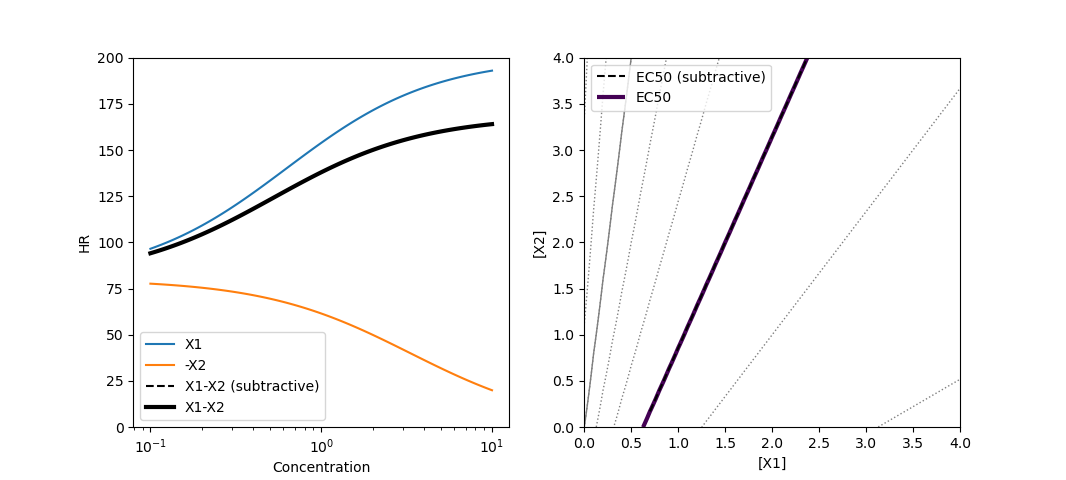

In [83]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4)/(1 + x2/2))
plot_effect_and_isobole(f_1, f_2, f_sum)

### Antagonism

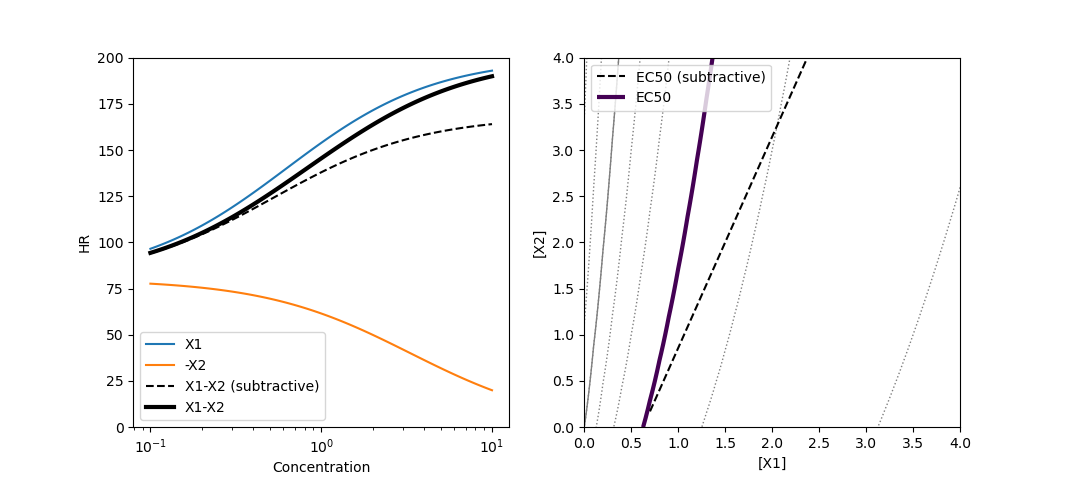

In [84]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4)/(1 + x2/2/(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)

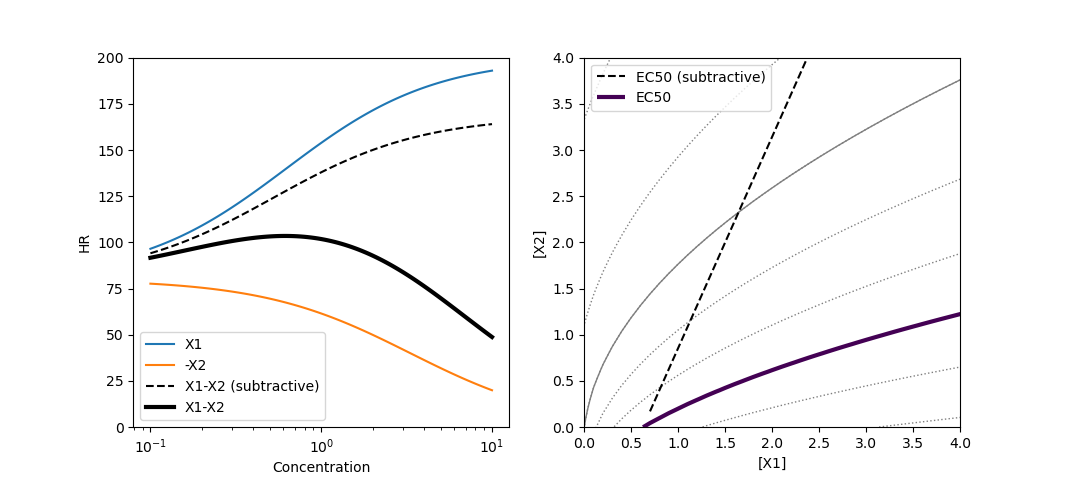

In [88]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4/(1 + x2*2))/(1 + x2/2))
plot_effect_and_isobole(f_1, f_2, f_sum)

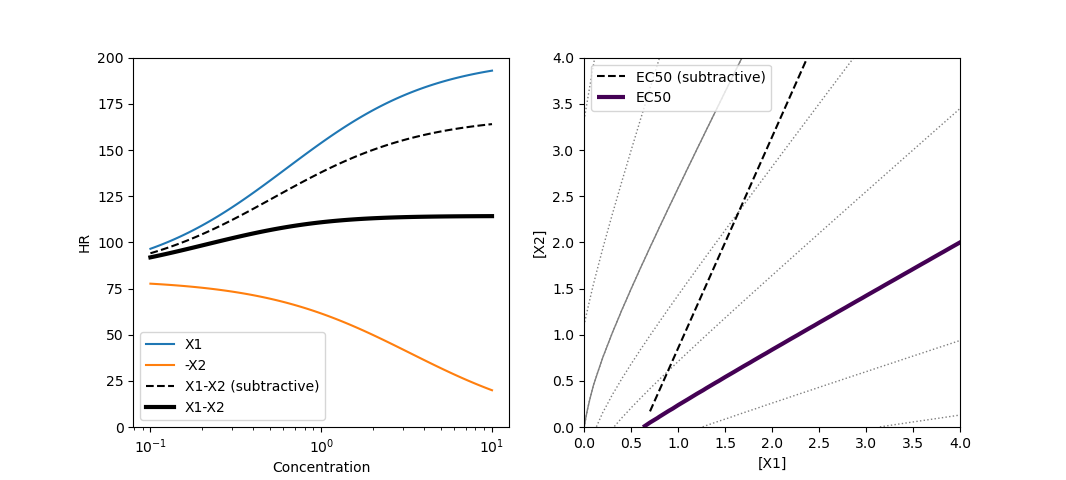

In [89]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4/(1 + x2*2))/(1 + x2/2/(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)

### Misc

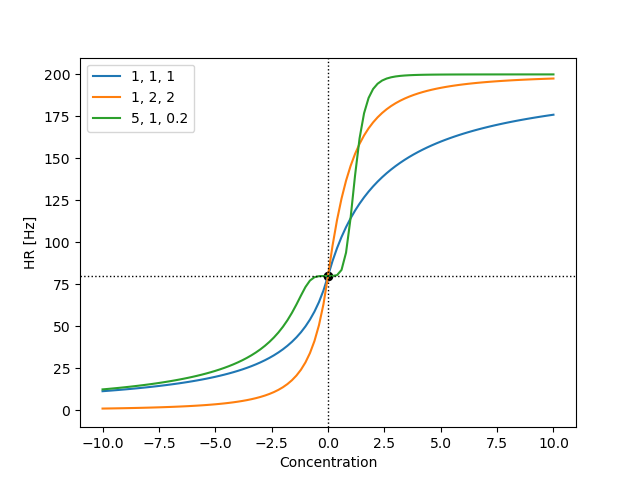

In [123]:
def AceHill(x, c_0, y_min, y_0, y_max, g, n_p, n_m):
    y = np.zeros(x.shape)
    y[:] = y_0
    y[x>0] = (y_max - y_min) * Hill(c_0 * (1 + (x[x>0])**g)**n_p) + y_min
    y[x<0] = (y_max - y_min) * Hill(c_0 / (1 + (-x[x<0])**g)**n_m) + y_min
    return y

def get_ace_hill(y_min, y_0, y_max, g, n_p, n_m):
    c_0 = (y_0 + y_min) / (y_max - y_0 - 2*y_min)
    return lambda x: AceHill(x, c_0, y_min, y_0, y_max, g, n_p, n_m)

x_list_v2 = np.linspace(-10, 10, 101)
fig, ax = plt.subplots(1, 1)
ax.plot(x_list_v2, get_ace_hill(0, 80, 200, 1, 1, 1)(x_list_v2), label='1, 1, 1')
ax.plot(x_list_v2, get_ace_hill(0, 80, 200, 1, 2, 2)(x_list_v2), label='1, 2, 2')
ax.plot(x_list_v2, get_ace_hill(0, 80, 200, 5, 1, 0.2)(x_list_v2), label='5, 1, 0.2')
ax.axhline(y=80, color='k', ls=':', lw=1)
ax.axvline(x=0, color='k', ls=':', lw=1)
ax.scatter([0], [80], color='k')
ax.set_xlabel('Concentration')
ax.set_ylabel('HR [Hz]')
ax.set_ylim([-10, 210])
ax.legend()

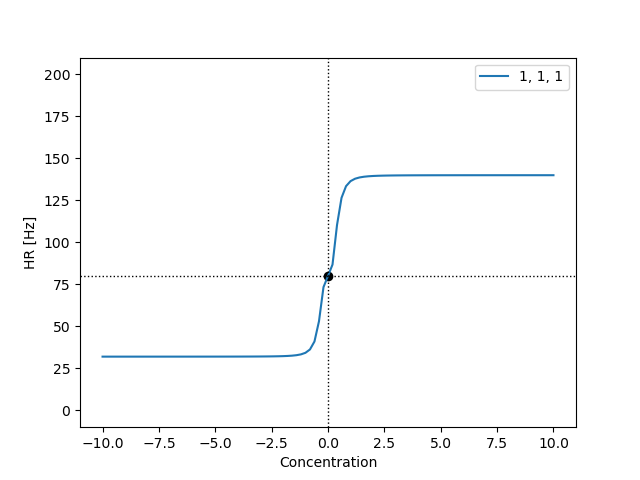

In [141]:
def AceHill(x, c_0, y_min, y_0, y_max, g, n_p, n_m):
    y = np.zeros(x.shape)
    y[:] = y_0
    y[x>0] = (y_max - y_min) * Hill(c_0 * (1 + (x[x>0])**g)**n_p) + y_min
    y[x<0] = (y_max - y_min) * Hill(c_0 / (1 + (-x[x<0])**g)**n_m) + y_min
    return y

def get_ace_hill(y_min, y_0, y_max, g, n_p, n_m):
    c_0 = (y_0 + y_min) / (y_max - y_0 - 2*y_min)
    return lambda x: AceHill(x, c_0, y_min, y_0, y_max, g, n_p, n_m)

x_list_v2 = np.linspace(-10, 10, 101)
fig, ax = plt.subplots(1, 1)
ax.plot(x_list_v2, get_ace_hill(0, 80, 200, 1, 1, 1)(2.5 * AbsHill((x_list_v2*2)**3)), label='1, 1, 1')
ax.axhline(y=80, color='k', ls=':', lw=1)
ax.axvline(x=0, color='k', ls=':', lw=1)
ax.scatter([0], [80], color='k')
ax.set_xlabel('Concentration')
ax.set_ylabel('HR [Hz]')
ax.set_ylim([-10, 210])
ax.legend()

/tmp/ipykernel_759450/1214847493.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 10)(2 * Hill((np.sum(A(t_list, t0) for t0 in range(0, 400, 50)))*3)), label=op)


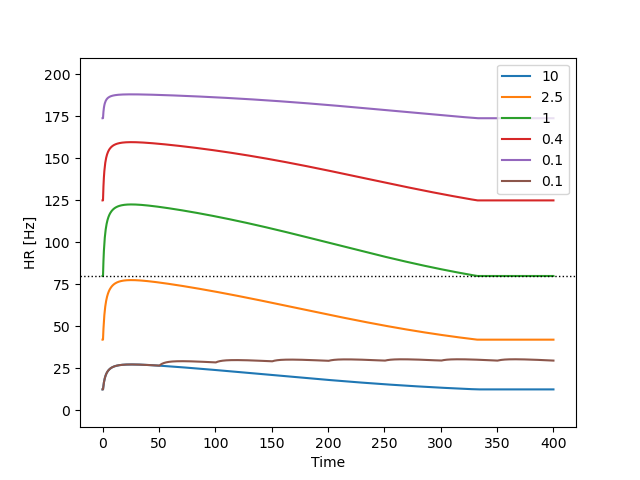

In [74]:
k_a = 0.1
k_d = 0.01

def A(t, t0=0):
    out = np.zeros(t.shape)
    out[t > t0] = k_a / (k_a - k_d) * (np.exp(-k_d * (t[t > t0] - t0)) - np.exp(-k_a * (t[t > t0] - t0))) - 0.04
    out[out < 0] = 0
    return out

t_list = np.linspace(0, 400, 1000)

def AceHill2(x, c_0, y_min, y_0, y_max, g, n_p, op):
    return (y_max - y_min) * Hill(c_0 * (1 + (x)**g)**n_p / op)+ y_min

def get_ace_hill2(y_min, y_0, y_max, g, n_p, op):
    c_0 = (y_0 + y_min) / (y_max - y_0 - 2*y_min)
    return lambda x: AceHill2(x, c_0, y_min, y_0, y_max, g, n_p, op)

fig, ax = plt.subplots(1, 1)

for op in [10, 2.5, 1, 1/2.5, 1/10]:
    ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, op)(2 * Hill(A(t_list)*3)), label=op)

ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 10)(2 * Hill((np.sum(A(t_list, t0) for t0 in range(0, 400, 50)))*3)), label=op)

ax.axhline(y=80, color='k', ls=':', lw=1)
ax.set_xlabel('Time')
ax.set_ylabel('HR [Hz]')
ax.set_ylim([-10, 210])
ax.legend()

/tmp/ipykernel_759450/233652123.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 1)(np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 100))*2), label='B')
/tmp/ipykernel_759450/233652123.py:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 10)(np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 100))*2), label='B')
/tmp/ipykernel_759450/233652123.py:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 9 * np.exp(-t_list/100) + 1)(np.sum(A(t_list, t0)

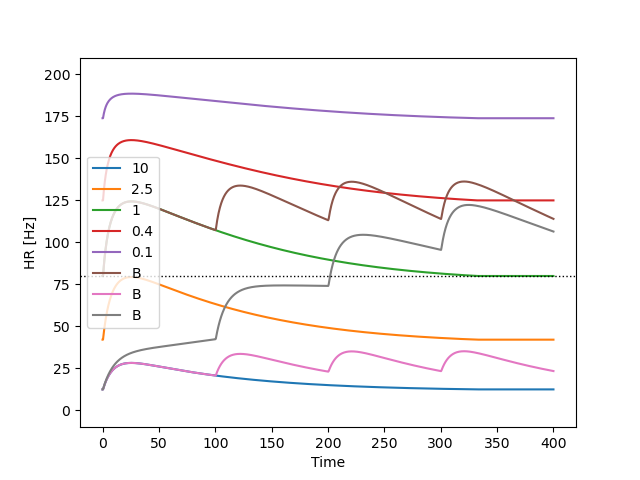

In [78]:
k_a = 0.1
k_d = 0.01

def A(t, t0=0):
    out = np.zeros(t.shape)
    out[t > t0] = k_a / (k_a - k_d) * (np.exp(-k_d * (t[t > t0] - t0)) - np.exp(-k_a * (t[t > t0] - t0))) - 0.04
    out[out < 0] = 0
    return out

t_list = np.linspace(0, 400, 1000)

def AceHill2(x, c_0, y_min, y_0, y_max, g, n_p, op):
    return (y_max - y_min) * Hill(c_0 * (1 + (x)**g)**n_p / op)+ y_min

def get_ace_hill2(y_min, y_0, y_max, g, n_p, op):
    c_0 = (y_0 + y_min) / (y_max - y_0 - 2*y_min)
    return lambda x: AceHill2(x, c_0, y_min, y_0, y_max, g, n_p, op)

fig, ax = plt.subplots(1, 1)

for op in [10, 2.5, 1, 1/2.5, 1/10]:
    ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, op)(A(t_list)*2), label=op)

ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 1)(np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 100))*2), label='B')
ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 10)(np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 100))*2), label='B')
ax.plot(t_list, get_ace_hill2(0, 80, 200, 1, 1, 9 * np.exp(-t_list/100) + 1)(np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 100))*2), label='B')



ax.axhline(y=80, color='k', ls=':', lw=1)
ax.set_xlabel('Time')
ax.set_ylabel('HR [Hz]')
ax.set_ylim([-10, 210])
ax.legend()

/tmp/ipykernel_759450/3179964763.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  plt.plot(t_list, np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 50))*2, label='B')
/tmp/ipykernel_759450/3179964763.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  plt.plot(t_list, np.sum(A(t_list, t0) * 1 for t0 in [0])*2, label='B')


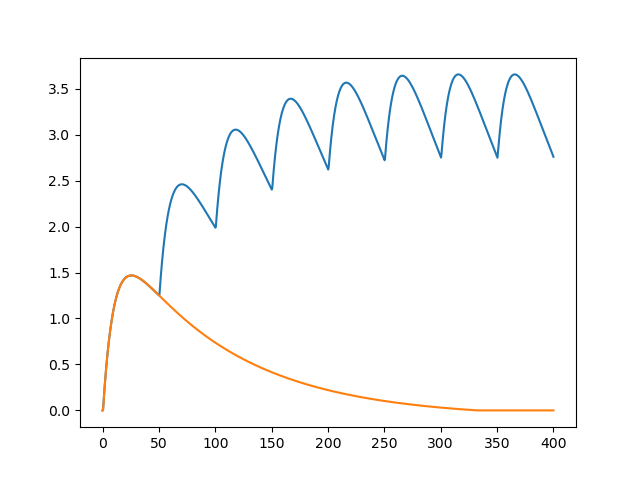

In [79]:
plt.figure()
plt.plot(t_list, np.sum(A(t_list, t0) * 1 for t0 in range(0, 400, 50))*2, label='B')
plt.plot(t_list, np.sum(A(t_list, t0) * 1 for t0 in [0])*2, label='B')
